# Getting started with Qiskit

Original source: [Documentation](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)

Installing Qiskit textbook packages See README.md

#### Before you deep dive into the code, check the following definition:
- Qubit: A qubit is a quantum bit.
- Qiskit: A software development toolkit to work with quantum computers


In quantum mechanics, instead of using normal probabilities, we use $\textit{probability amplitudes}$. Amplitudes are similar to probabilities as each outcome has a $\textbf{magnitude}$ which tells how likely the outcome is to occur. However, amplitudes have an another additional property: $\textbf{phase}$ which tells the direction.
More info can be found [here](https://learn.qiskit.org/course/introduction/what-is-quantum).

### Exercise 1:
If you have $n$ qubits, how many possible outcomes are there?
### Exercise 2:
If you want to predict the behaviour of $n$ qubits using vectors like those above, you need to keep track of at most __ amplitudes.

## Workflow of Qiskit

- Build: Design a quantum circuit(s) that represents the problem at hand.
- Execute: Compile and run circuits in different background such as in a specific quantum system or classical simulator.

We will go through some examples here.


#### Build

We import the following routines from the Qiskit library:

- QuantumCircuit: This routine is used to create a quantum circuit.


Here, we generate our first quantum circuit with 2 qubits and 2 outputs.

In [1]:
from qiskit import QuantumCircuit

In [2]:
n = 2
n_q = n # quibits
n_b = n # output
qc_output = QuantumCircuit(n_q, n_b)

In [3]:
qc_output.draw()

q_0: 
     
q_1: 
     
c: 2/

We don't see anything yet!

The extraction of outputs in QC is done using an operation called $\textit{measure}$. Each measurement tells a specific qubit to give an output to a specific output bit.

The command qc_output.measure(j, j) tells qubit j to write an output to bit j.

In [4]:
for j in range(n):
    qc_output.measure(j,j)

Now, see the difference!

In [5]:
qc_output.draw()

┌─┐   
q_0: ┤M├───
     └╥┘┌─┐
q_1: ─╫─┤M├
      ║ └╥┘
c: 2/═╩══╩═
      0  1

#### Execute

Qubits are always initialized to give the output 0. 
We do not have anything in out qubits in the circuit above.
We can see this by running the circuit many times and plotting the results in a histogram.

Here, we will use the following routines:

- QasmSimulator: We use an Aer simulator. More info about [Aer](https://medium.com/qiskit/qiskit-aer-d09d0fac7759)
- plot_histogram: This routine plots histogram

Examples with different [Aer backend](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html#:~:text=A%20basic%20workflow%20using%20Qiskit,run%20them%20on%20different%20backends.)

In [6]:
from qiskit.providers.aer import QasmSimulator

In [7]:
# Use Aer's qasmSimulator
simulator = QasmSimulator()

In [8]:
# Execute the circuit on the qasm simulator
job = simulator.run(qc_output, shots=1000)


In [9]:
# Grab results from the job
result = job.result()

In [10]:
# See what the result contains
result

Result(backend_name='qasm_simulator', backend_version='0.10.2', qobj_id='6ffca9de-6881-4ce2-b724-5c5eeb7a6992', job_id='5e988017-772d-4147-8fca-0ecf5257ba43', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1000}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-0', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=458469084, metadata={'parallel_state_update': 12, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 2, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'num_clbits': 2, 'input_qubit_map': [[1, 1], [0, 0]], 'fusion': {'enabled': False}}, time_taken=0.00201371)], date=2022-02-13T15:23:39.116391, status=COMPLETED, status=QobjHeader(backend_name='

In [11]:
# Returns counts
counts = result.get_counts(qc_output)

### Visualize 

We can visualize using plot_histogram().

You can find more visualization routines [here](https://qiskit.org/documentation/apidoc/visualization.html)

In [12]:
from qiskit.visualization import plot_histogram

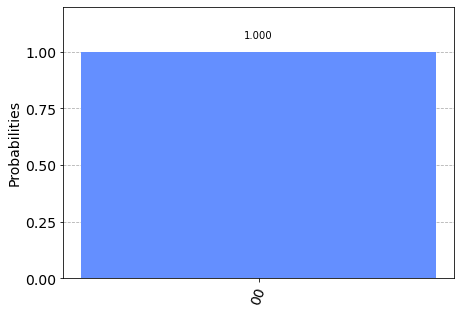

In [13]:
plot_histogram(counts)

We will always see that the result is 00: a 0 from each qubit.

### Exercise 
Change n = 2 to n = 8. Build the circuit, compile and run the visualization. See how the results differ.

### Example
[ref](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html)

Construct a simple bell state circuit.

Construct a 5-qubit GHZ circuit.